In [1]:
import numpy as np
import pandas as pd

feature_o=pd.read_csv('./tmp/cafe_features_100m.csv')
feature_o['zone']=feature_o['addr'].copy()
feature_o['zone']=feature_o['zone'].str.split('區',expand=True).drop([1,2], axis=1)
feature = feature_o.loc[:,'density_2021':'train'].fillna(0)
feature

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
0,30537.582094,-1.038945,3844691,1,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,3.0,0.0
1,34199.348503,-1.879027,1857272,3,0.0,0.0,0.0,0.0,0.0,20.0,0.0,2.0,1.0,0.0,4.0,0.0
2,16690.778379,-0.500099,2769267,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0
3,30029.689819,-0.402234,2750941,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
4,37267.488548,-1.043902,1839588,1,0.0,0.0,0.0,0.0,0.0,20.0,0.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,33846.823431,-0.448332,904809,1,0.0,2.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
669,15354.918545,-0.271195,2131815,1,0.0,2.0,0.0,0.0,0.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0
670,4921.167930,-2.656622,77812,1,0.0,1.0,0.0,1.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0
671,6298.055230,7.973902,991876,1,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


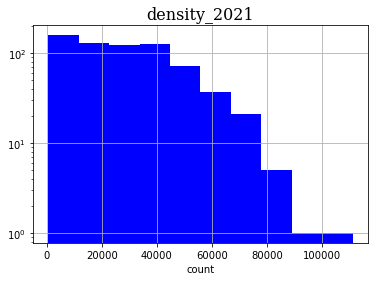

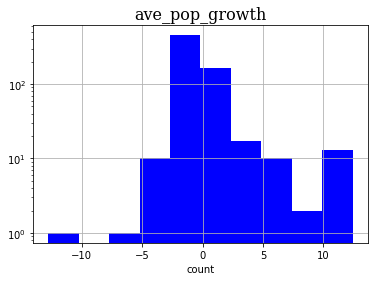

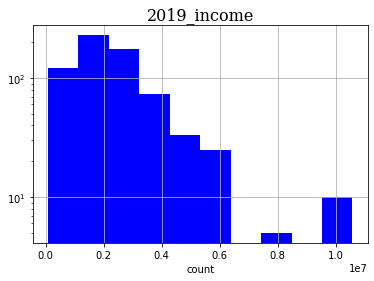

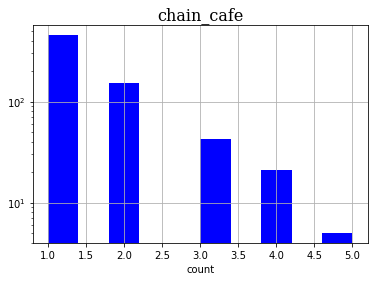

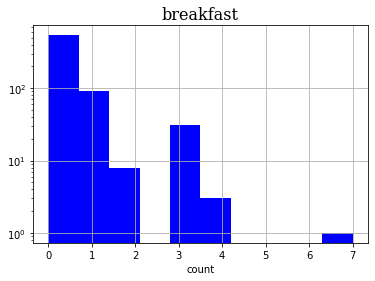

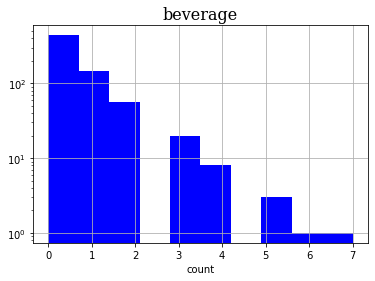

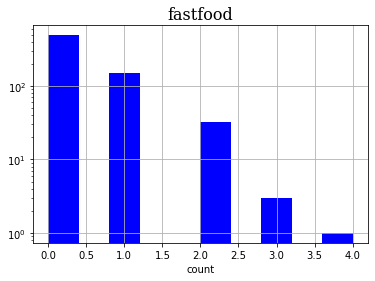

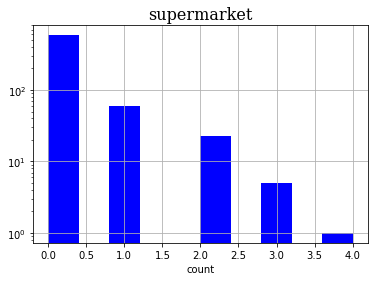

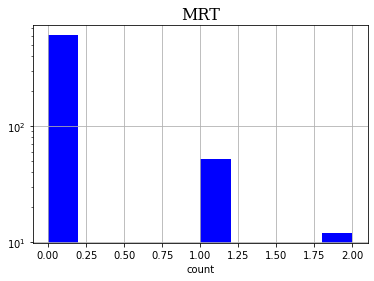

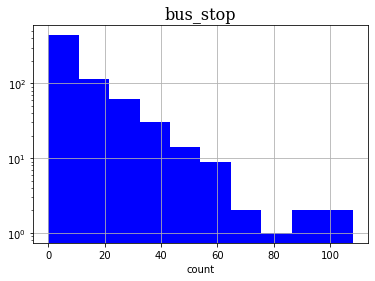

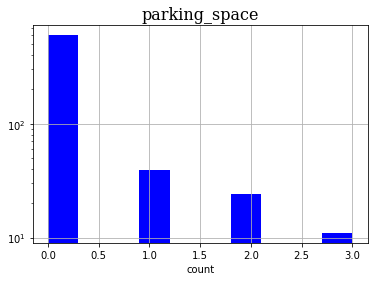

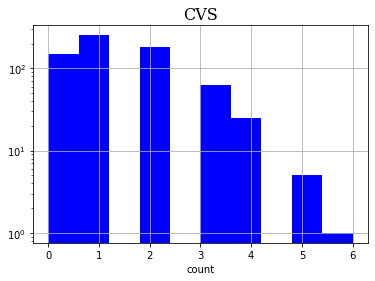

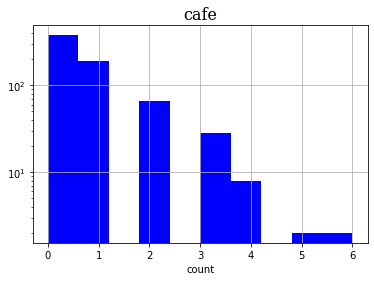

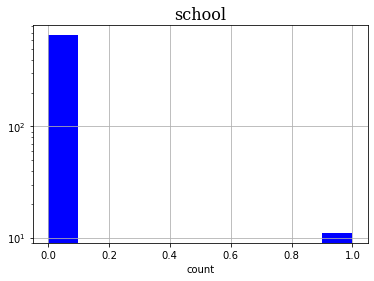

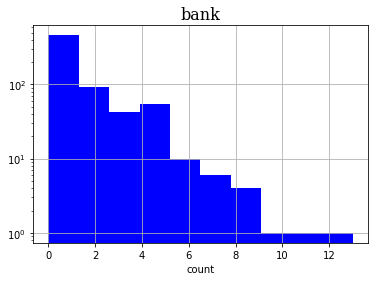

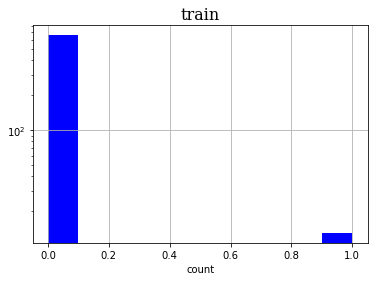

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
columns=feature.columns.tolist()
for i in columns:
    x = feature[i]

# the histogram of the data
    n, bins, patches = plt.hist(x, facecolor='b',log=True)

    plt.xlabel('count')
    
    font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
    
    plt.title(f'{i}',fontdict=font)
    plt.grid(True)
    plt.show()

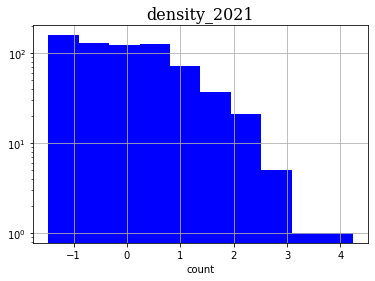

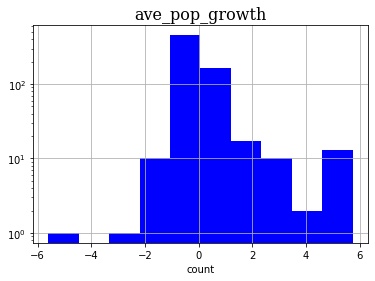

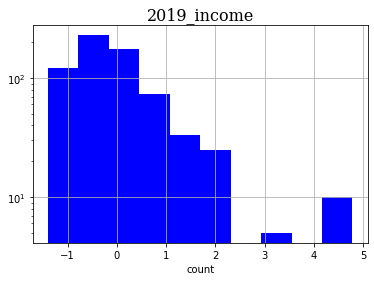

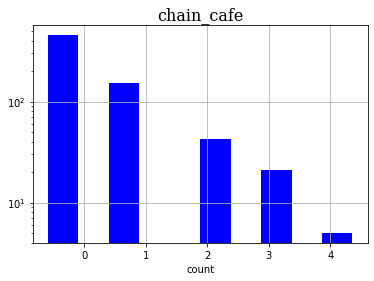

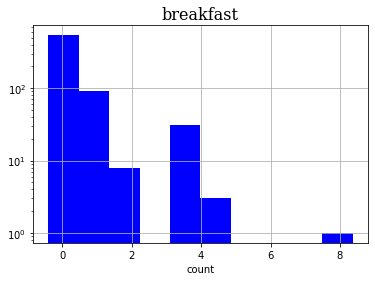

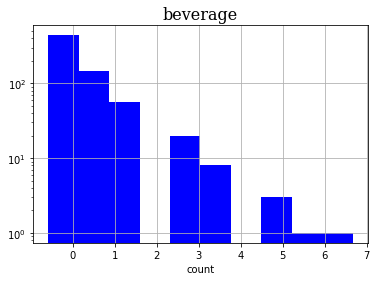

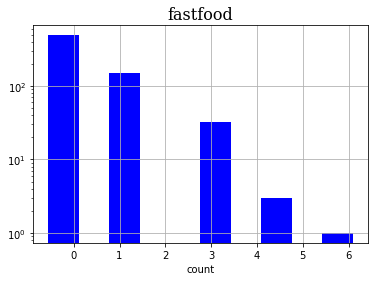

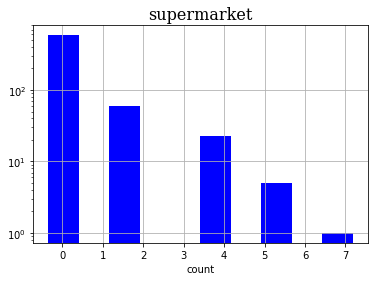

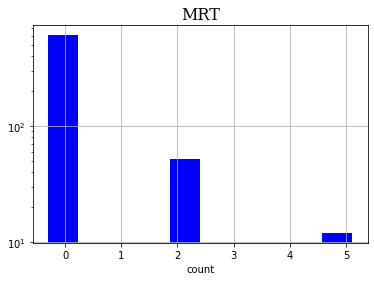

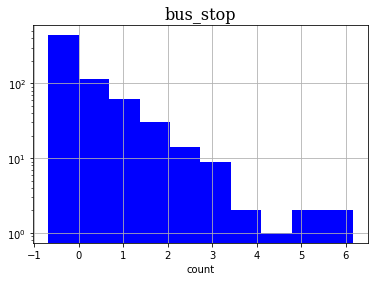

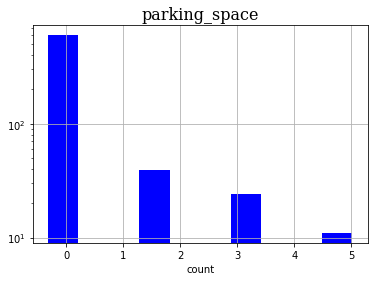

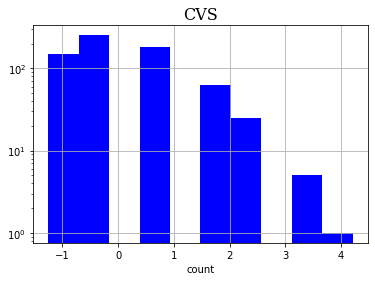

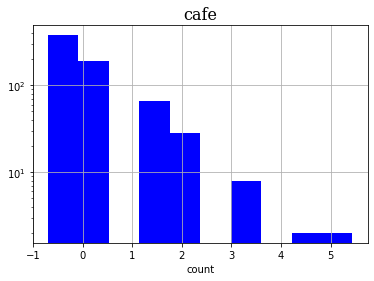

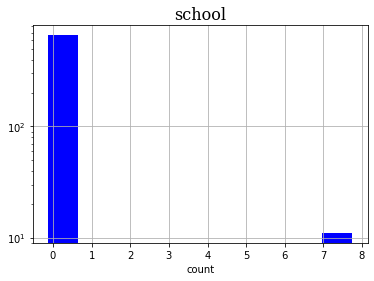

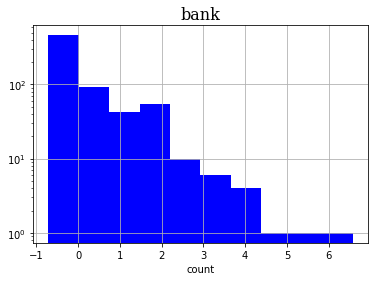

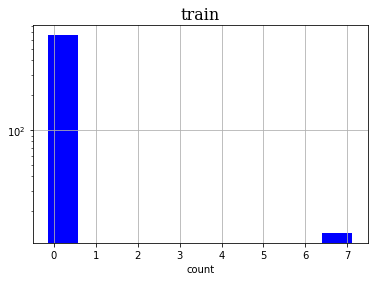

In [3]:
columns=feature.columns.tolist()
for i in columns:
    x = feature[i]
    mu = x.mean()
    std = x.std()

    z_score_normalized = (x - mu) / std

    n, bins, patches = plt.hist(z_score_normalized, facecolor='b',log=True)

    plt.xlabel('count')

    font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

    plt.title(f'{i}',fontdict=font)
    plt.grid(True)
    plt.show()

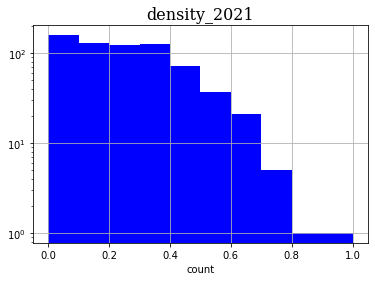

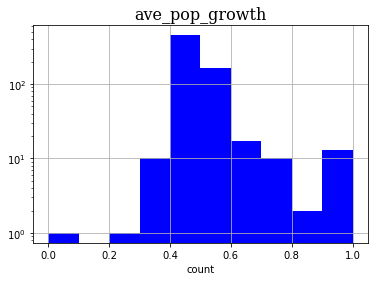

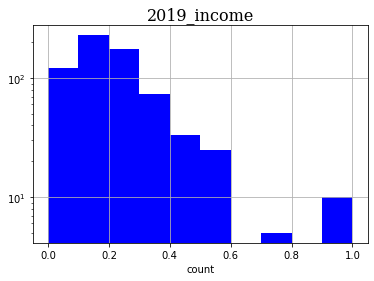

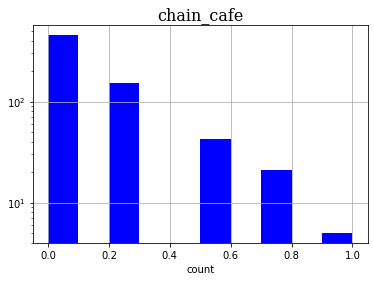

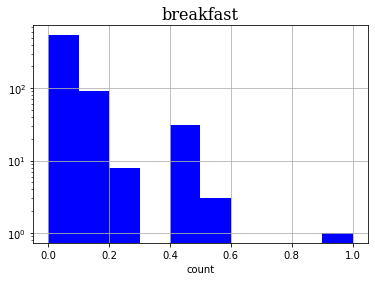

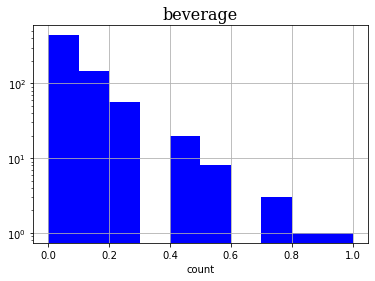

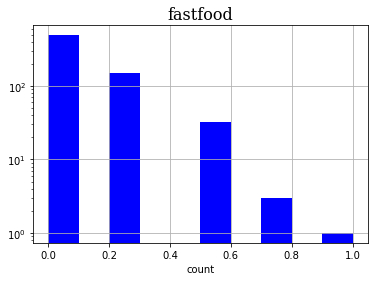

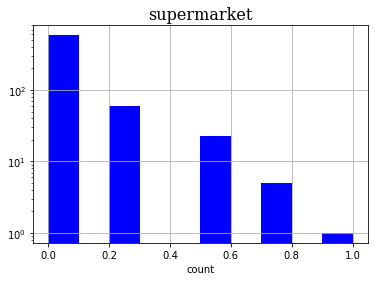

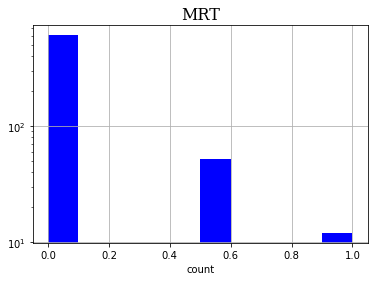

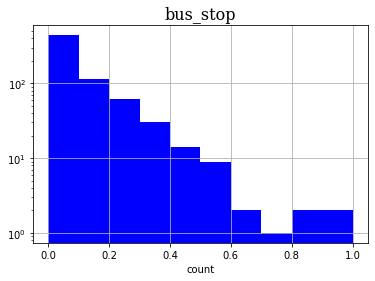

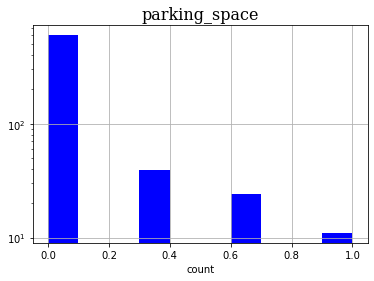

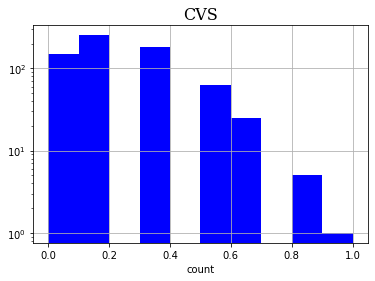

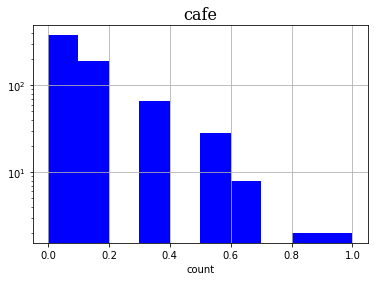

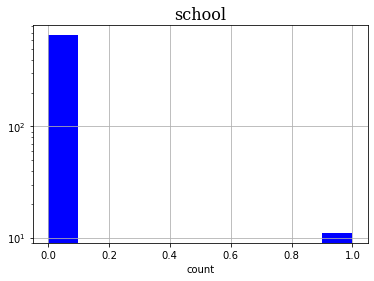

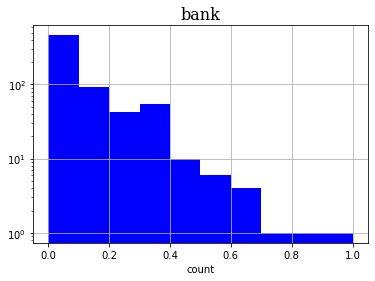

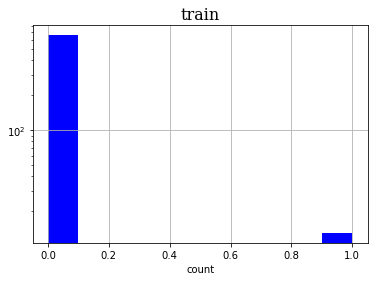

In [4]:
columns=feature.columns.tolist()
for i in columns:
    x = feature[i]

    MinMax_normalization= (x - x.min()) /(x.max() - x.min() )

    n, bins, patches = plt.hist(MinMax_normalization, facecolor='b',log=True)

    plt.xlabel('count')

    font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

    plt.title(f'{i}',fontdict=font)
    plt.grid(True)
    plt.show()

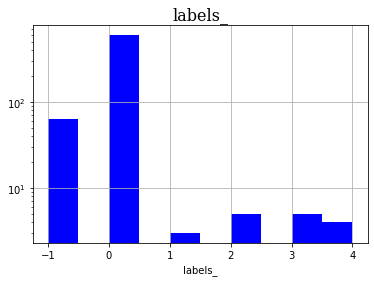

{-1, 0, 1, 2, 3, 4}

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1, metric='cityblock', min_samples=3).fit(X)

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

set(clustering.labels_)

In [6]:
feature_o['labels'] = list(clustering.labels_)

In [7]:
# from pandas.plotting import bootstrap_plot

# bootstrap_plot(df,color="grey");

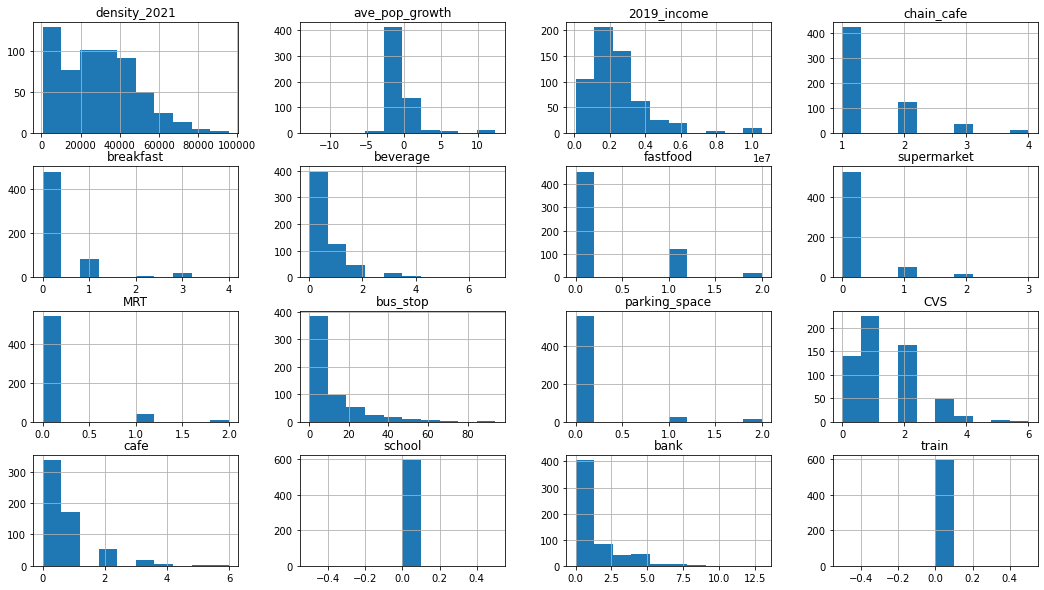

In [8]:
df_0 = feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']

df_0.hist(figsize=(18, 10));

# 大部分人口密度(27313.32)
# 人口大多緩步負成長(-0.8184590)
# 年收均值(2038014)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(3)站

In [9]:
df_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,593.000000,593.000000,5.930000e+02,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.0,593.000000,593.0
mean,29156.673188,-0.398541,2.433891e+06,1.394604,0.284992,0.517707,0.273187,0.145025,0.089376,9.883642,0.079258,1.291737,0.647555,0.0,1.269815,0.0
std,19067.733679,2.261498,1.723867e+06,0.701907,0.705716,0.911696,0.516197,0.441756,0.329473,14.229951,0.337105,1.028750,0.945597,0.0,1.752811,0.0
min,620.705292,-12.785775,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,12754.927193,-1.400887,1.259438e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0
50%,27313.324968,-0.818459,2.038014e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0
75%,41610.840789,-0.014965,2.988501e+06,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2.000000,1.000000,0.0,2.000000,0.0
max,95907.282896,12.415476,1.057882e+07,4.000000,4.000000,7.000000,2.000000,3.000000,2.000000,94.000000,2.000000,6.000000,6.000000,0.0,13.000000,0.0


In [10]:
df_0.median()

density_2021      2.731332e+04
ave_pop_growth   -8.184590e-01
2019_income       2.038014e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          4.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

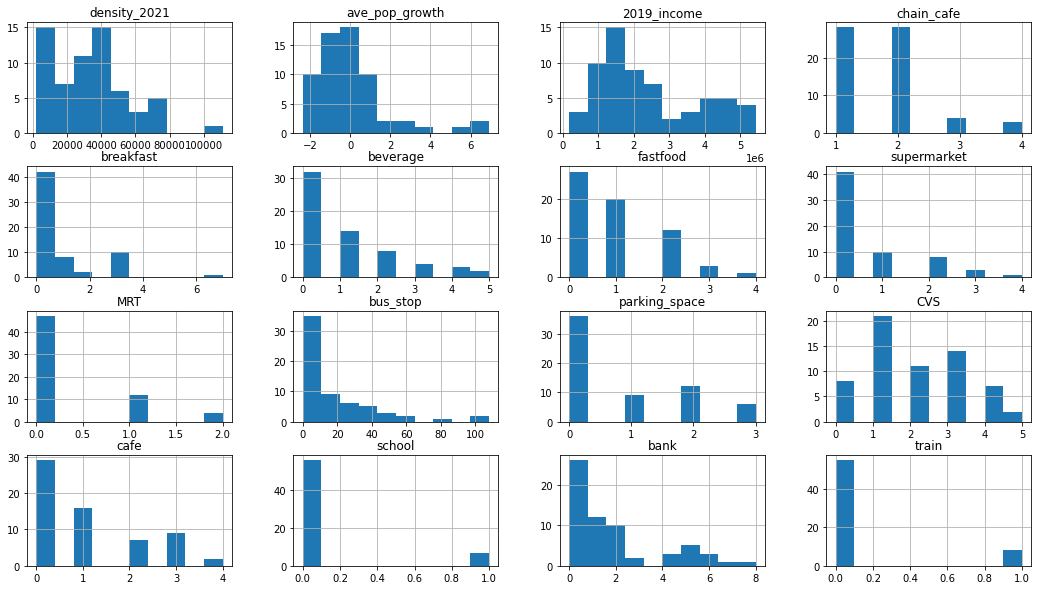

In [11]:
df_i1 = feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']

df_i1.hist(figsize=(18, 10));

# 大部分人口密度(31029.76)
# 人口大多緩步負成長(-0.3575181)
# 年收均值(2117078)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(1)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(8)站

In [12]:
df_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32940.618764,0.011208,2.423775e+06,1.714286,0.777778,1.015873,0.904762,0.619048,0.317460,17.825397,0.809524,1.952381,1.031746,0.111111,1.714286,0.126984
std,22523.934927,1.848874,1.371823e+06,0.791662,1.373064,1.361831,0.979043,0.990741,0.590937,25.172014,1.060389,1.349176,1.204404,0.316794,2.120777,0.335630
min,2156.336462,-2.364998,1.861650e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14193.578514,-0.894420,1.535054e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31034.078879,-0.357518,2.117078e+06,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,45612.205397,0.585770,3.470032e+06,2.000000,1.000000,2.000000,1.500000,1.000000,0.500000,28.500000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
max,110994.346742,6.920059,5.429764e+06,4.000000,7.000000,5.000000,4.000000,4.000000,2.000000,108.000000,3.000000,5.000000,4.000000,1.000000,8.000000,1.000000


In [13]:
df_i1.median()

density_2021      3.103408e+04
ave_pop_growth   -3.575181e-01
2019_income       2.117078e+06
chain_cafe        2.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          8.000000e+00
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

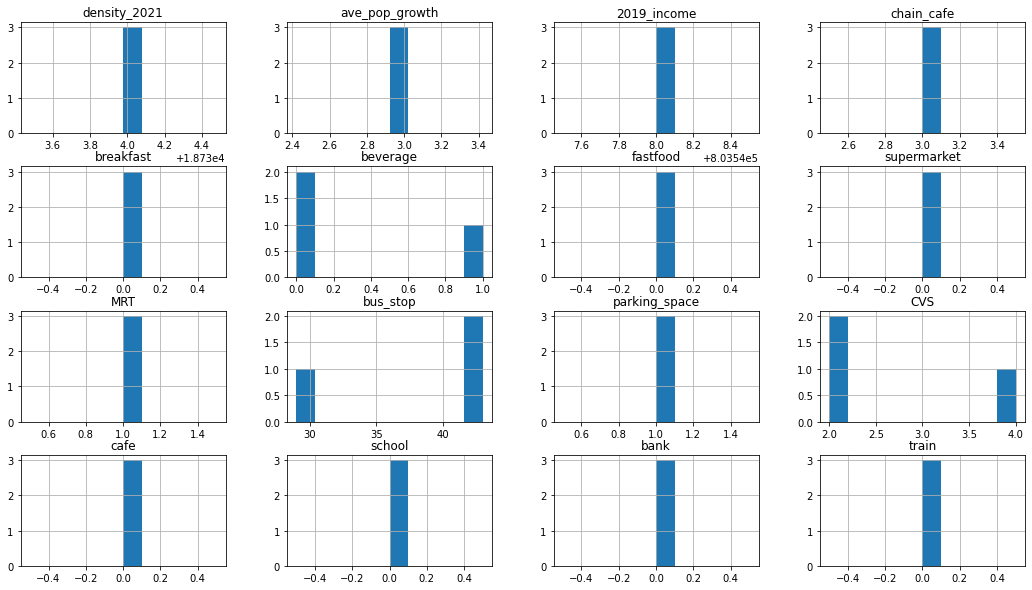

In [14]:
df_1 = feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']

df_1.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口大多緩步負成長(2.921902)
# 年收均值(803548)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(1)
# CVS(2)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(43)站

In [15]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
269,louisa,新北市新店區北宜路一段26號,24.957101,121.537961,18733.977285,2.921902,803548,3,0.0,1.0,...,1.0,29.0,1.0,4.0,0.0,0.0,0.0,0.0,新北市新店,1
509,stbks,新北市新店區北宜路一段2號,24.957871,121.537784,18733.977285,2.921902,803548,3,0.0,0.0,...,1.0,43.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市新店,1
510,stbks,新北市新店區北宜路一段2號2F,24.957871,121.537784,18733.977285,2.921902,803548,3,0.0,0.0,...,1.0,43.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市新店,1


In [16]:
df_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.0
mean,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.333333,0.0,0.0,1.0,38.333333,1.0,2.666667,0.0,0.0,0.0,0.0
std,0.000000,5.438960e-16,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,8.082904,0.0,1.154701,0.0,0.0,0.0,0.0
min,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.000000,0.0,0.0,1.0,29.000000,1.0,2.000000,0.0,0.0,0.0,0.0
25%,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.000000,0.0,0.0,1.0,36.000000,1.0,2.000000,0.0,0.0,0.0,0.0
50%,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.000000,0.0,0.0,1.0,43.000000,1.0,2.000000,0.0,0.0,0.0,0.0
75%,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.500000,0.0,0.0,1.0,43.000000,1.0,3.000000,0.0,0.0,0.0,0.0
max,18733.977285,2.921902e+00,803548.0,3.0,0.0,1.000000,0.0,0.0,1.0,43.000000,1.0,4.000000,0.0,0.0,0.0,0.0


In [17]:
df_1.median()

density_2021       18733.977285
ave_pop_growth         2.921902
2019_income       803548.000000
chain_cafe             3.000000
breakfast              0.000000
beverage               0.000000
fastfood               0.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              43.000000
parking_space          1.000000
CVS                    2.000000
cafe                   0.000000
school                 0.000000
bank                   0.000000
train                  0.000000
dtype: float64

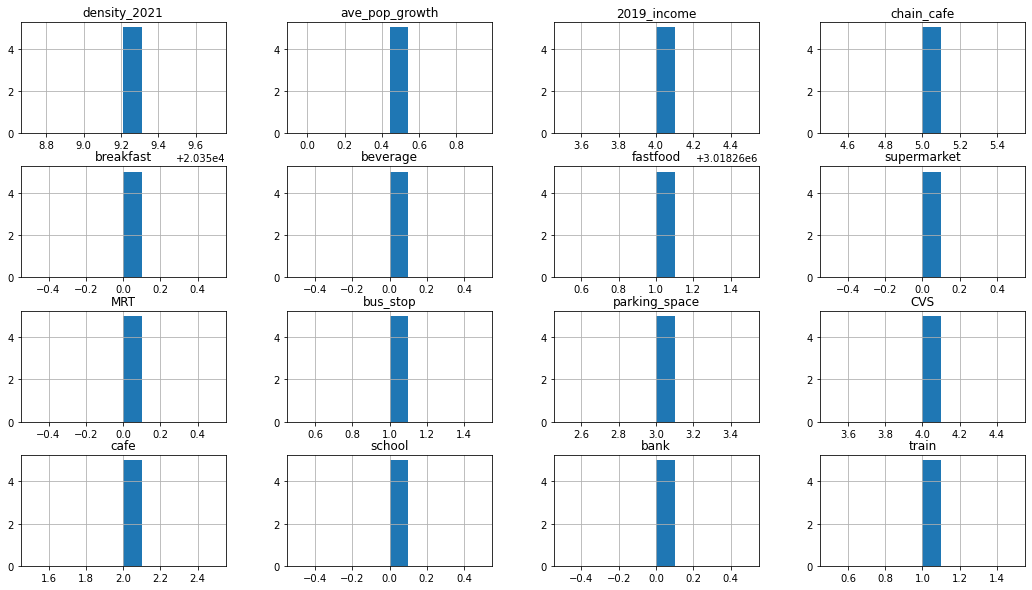

In [18]:
df_2 = feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']

df_2.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口大多緩步負成長(0.4416789)
# 年收均值(3018264)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(4)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(1)
# 巴士站至少(1)站

In [19]:
df_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
25%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
50%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
75%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
max,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0


In [20]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,2
533,stbks,新北市板橋區縣民大道二段7號1F,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,2
534,stbks,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,2
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,2
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,2


In [21]:
df_2.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.000000e+00
parking_space     3.000000e+00
CVS               4.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             1.000000e+00
dtype: float64

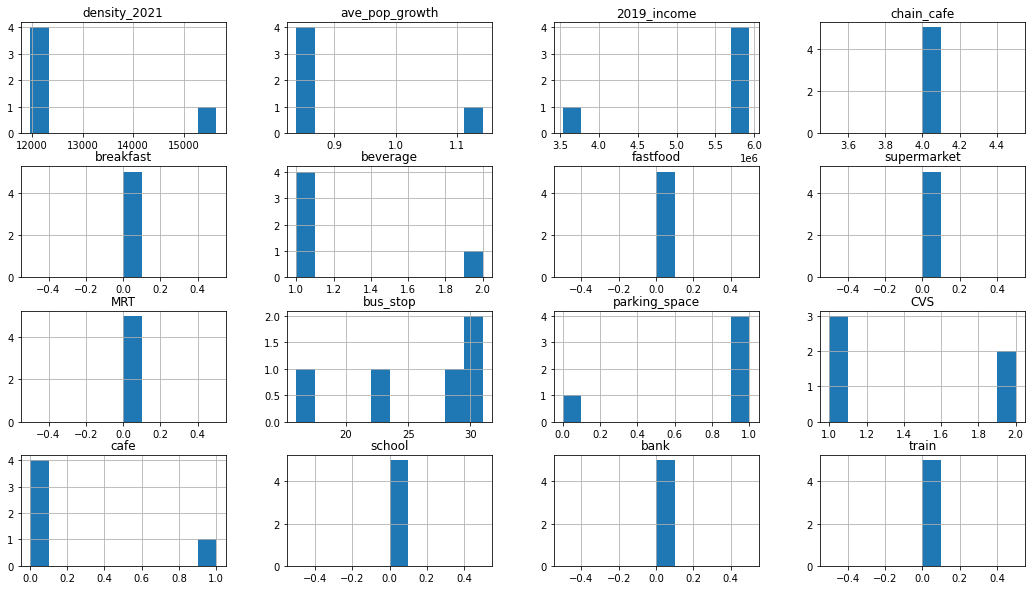

In [22]:
df_3 = feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']

df_3.hist(figsize=(18, 10));

# 大部分人口密度(11953.40)
# 人口大多緩步負成長(0.8386823)
# 年收均值(5934044)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(1)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(29)站

In [23]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
300,louisa,新北市板橋區南雅南路二段130號,24.996782,121.451925,15641.543072,1.141744,3539135,4,0.0,2.0,...,0.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,新北市板橋,3
317,louisa,新北市樹林區大雅路282號,24.947306,121.379956,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,23.0,1.0,1.0,0.0,0.0,0.0,0.0,新北市樹林,3
429,stbks,台北市士林區振興街37號,24.947638,121.379931,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,31.0,1.0,1.0,0.0,0.0,0.0,0.0,台北市士林,3
548,stbks,新北市樹林區大雅路288號,24.947600,121.379874,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市樹林,3
549,stbks,新北市樹林區家樂福北大店大雅路288號,24.947667,121.379910,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,31.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市樹林,3


In [24]:
df_3.median()

density_2021      1.195340e+04
ave_pop_growth    8.386823e-01
2019_income       5.934044e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          2.900000e+01
parking_space     1.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

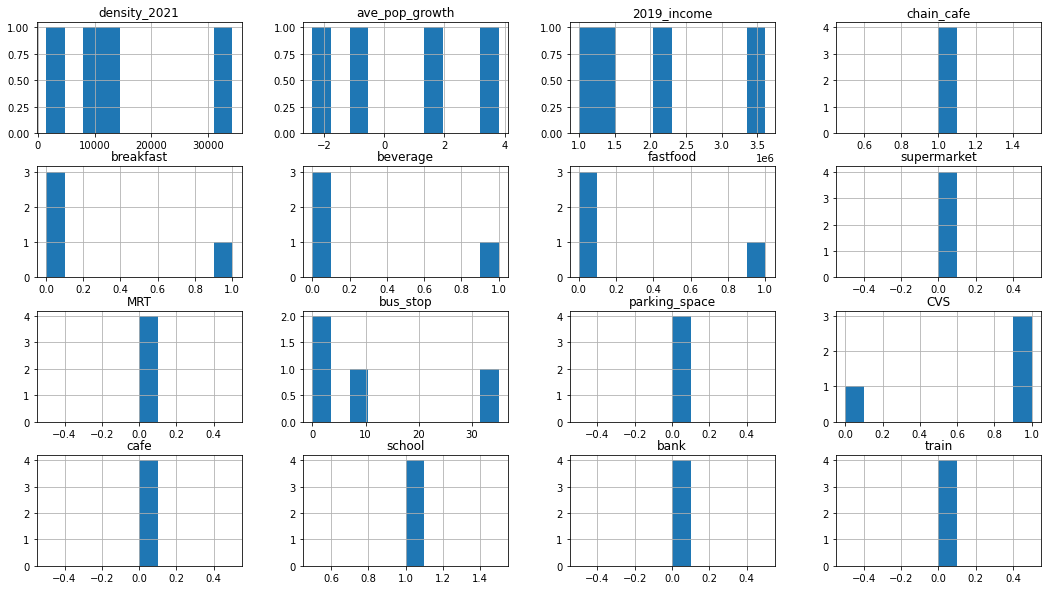

In [25]:
df_4 = feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']

df_4.hist(figsize=(18, 10));

# 大部分人口密度(10440.12)
# 人口大多緩步負成長(0.1822721)
# 年收均值(1721571)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(1)
# 銀行(0)
# 火車站(0)
# 巴士站至少(5)站

In [26]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
168,louisa,台北市士林區臨溪路70號,25.094446,121.545751,1433.364351,-2.379690,1359341,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,台北市士林,4
260,louisa,新北市土城區明德路一段95號,24.983041,121.465660,34244.185097,1.378373,995845,1,1.0,0.0,...,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,新北市土城,4
309,louisa,新北市林口區仁愛路二段188號,25.073972,121.380520,11292.666042,3.801800,3610018,1,0.0,0.0,...,0.0,35.0,0.0,1.0,0.0,1.0,0.0,0.0,新北市林口,4
464,stbks,台北市文山區興隆路三段111號,25.000305,121.558330,9587.564505,-1.013829,2083801,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,台北市文山,4


In [27]:
df_4.median()

density_2021      1.044012e+04
ave_pop_growth    1.822721e-01
2019_income       1.721571e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          5.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            1.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

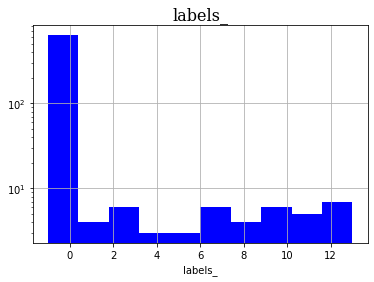

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pickle
from joblib import dump, load

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=4, metric='l1',algorithm='kd_tree' ,min_samples=3).fit(X)

# 存模型
clf = pickle.dumps(clustering)

dump(clf, 'nearby100m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()
set(clustering.labels_)

In [29]:
feature_o['labels'] = list(clustering.labels_)
dfz_i1=feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
dfz_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,249.000000,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,28130.285614,0.026491,2.685968e+06,1.582329,0.550201,0.847390,0.546185,0.409639,0.236948,15.493976,0.341365,1.493976,0.943775,0.044177,1.807229,0.032129
std,18695.537400,2.847351,1.969328e+06,0.747475,1.050389,1.225075,0.761257,0.773077,0.527548,20.476210,0.751300,1.292411,1.193418,0.205901,2.198558,0.176697
min,1318.101678,-12.785775,1.861650e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12649.652578,-1.335978,1.365870e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26122.241810,-0.596061,2.194717e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,39958.036112,0.585770,3.480259e+06,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,26.000000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000
max,110994.346742,12.415476,1.057882e+07,4.000000,7.000000,7.000000,4.000000,4.000000,2.000000,108.000000,3.000000,6.000000,6.000000,1.000000,13.000000,1.000000


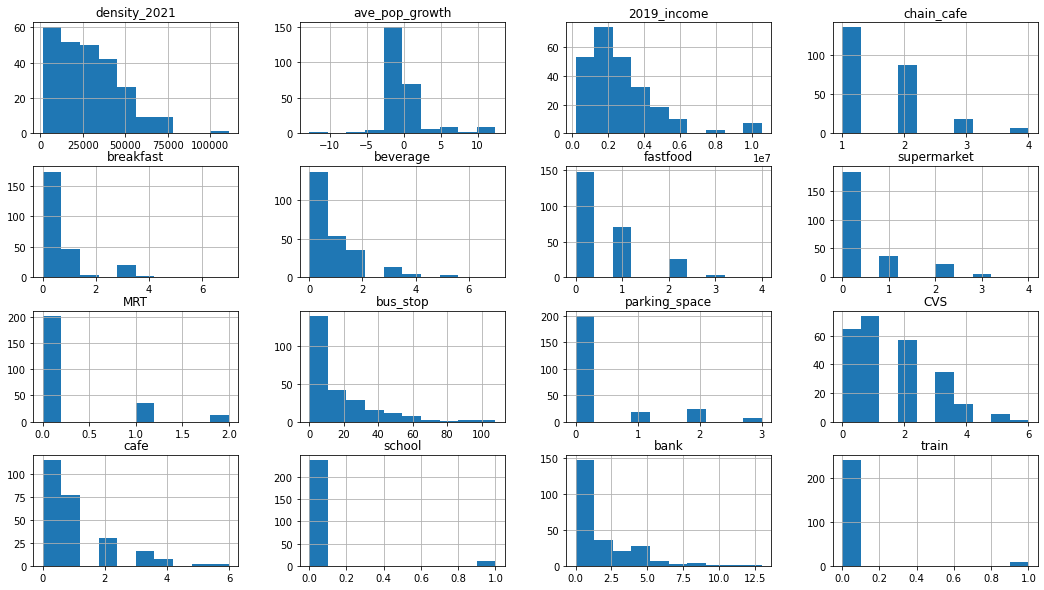

In [30]:
dfz_i1.hist(figsize=(18, 10));

# 大部分人口密度(26122.24)
# 人口大多緩步負成長(-0.5960607)
# 年收均值(2194717)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(7)站

In [31]:
dfz_i1.median()

density_2021      2.612224e+04
ave_pop_growth   -5.960607e-01
2019_income       2.194717e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          7.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

In [32]:
dfz_0=feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']
dfz_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,380.000000,380.000000,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.0
mean,30091.646323,-0.640226,2.223830e+06,1.226316,0.160526,0.360526,0.168421,0.060526,0.0,7.344737,0.026316,1.260526,0.518421,0.0,0.978947,0.0
std,19800.824456,1.579527,1.338558e+06,0.494126,0.468557,0.732956,0.395292,0.238774,0.0,10.717017,0.160284,0.937644,0.783859,0.0,1.421501,0.0
min,620.705292,-4.033235,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,12404.922147,-1.393061,1.214619e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0
50%,29673.228066,-0.898680,1.916904e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0
75%,42980.194256,-0.282750,2.748665e+06,1.000000,0.000000,0.250000,0.000000,0.000000,0.0,11.000000,0.000000,2.000000,1.000000,0.0,2.000000,0.0
max,95907.282896,9.949524,8.391668e+06,3.000000,3.000000,4.000000,2.000000,1.000000,0.0,57.000000,1.000000,4.000000,4.000000,0.0,7.000000,0.0


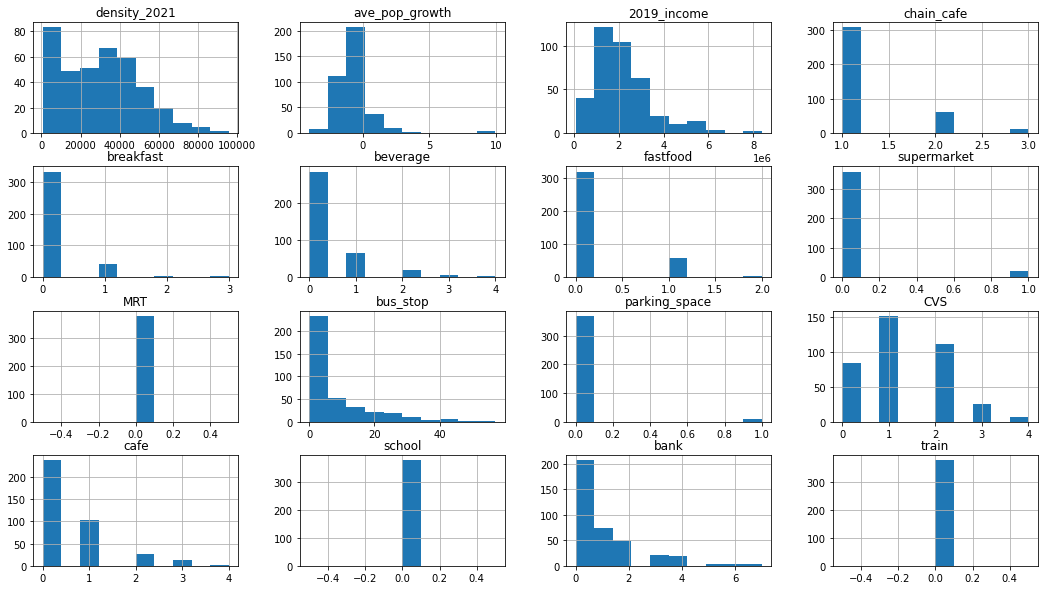

In [33]:
dfz_0.hist(figsize=(18, 10));

# 大部分人口密度(29673.23)
# 人口大多緩步負成長(-0.8986804)
# 年收均值(1916904)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(2)站

In [34]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,1,0.0,0.0,...,0.0,29.0,0.0,0.0,0.0,0.0,3.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,3,0.0,0.0,...,0.0,20.0,0.0,2.0,1.0,0.0,4.0,0.0,台北市中山,0
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,2,1.0,0.0,...,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,台北市中山,0
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,1,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,台北市中山,0
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,1,0.0,0.0,...,0.0,20.0,0.0,1.0,2.0,0.0,0.0,0.0,台北市中山,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,85 cafe,新北市蘆洲區長安街225號1樓,25.082557,121.459412,60483.650968,-0.514861,975373,1,0.0,1.0,...,0.0,16.0,0.0,4.0,1.0,0.0,1.0,0.0,新北市蘆洲,0
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,0.0,2.0,...,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,新北市蘆洲,0
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,0.0,2.0,...,0.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市蘆洲,0
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,1,0.0,1.0,...,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市金山,0


In [35]:
dfz_0.median()

density_2021      2.967323e+04
ave_pop_growth   -8.986804e-01
2019_income       1.916904e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          2.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

In [36]:
dfz_1=feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']
dfz_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.00,4.00,4.0,4.000000,4.0
mean,22399.060766,-2.131716,2435957.0,4.0,0.0,1.0,0.0,0.0,1.0,2.75,0.0,1.25,1.25,0.0,1.750000,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.50,0.50,0.0,0.957427,0.0
min,22399.060766,-2.131716,2435957.0,4.0,0.0,1.0,0.0,0.0,1.0,2.00,0.0,1.00,1.00,0.0,1.000000,0.0
25%,22399.060766,-2.131716,2435957.0,4.0,0.0,1.0,0.0,0.0,1.0,2.00,0.0,1.00,1.00,0.0,1.000000,0.0
50%,22399.060766,-2.131716,2435957.0,4.0,0.0,1.0,0.0,0.0,1.0,2.00,0.0,1.00,1.00,0.0,1.500000,0.0
75%,22399.060766,-2.131716,2435957.0,4.0,0.0,1.0,0.0,0.0,1.0,2.75,0.0,1.25,1.25,0.0,2.250000,0.0
max,22399.060766,-2.131716,2435957.0,4.0,0.0,1.0,0.0,0.0,1.0,5.00,0.0,2.00,2.00,0.0,3.000000,0.0


In [37]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
21,cama,台北市信義區基隆路一段167號,25.041675,121.565175,22399.060766,-2.131716,2435957,4,0.0,1.0,...,1.0,2.0,0.0,2.0,2.0,0.0,3.0,0.0,台北市信義,1
129,louisa,台北市信義區忠孝東路五段33號,25.041308,121.565943,22399.060766,-2.131716,2435957,4,0.0,1.0,...,1.0,5.0,0.0,1.0,1.0,0.0,2.0,0.0,台北市信義,1
391,stbks,台北市信義區忠孝東路五段8號2F,25.040865,121.565417,22399.060766,-2.131716,2435957,4,0.0,1.0,...,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,台北市信義,1
397,stbks,台北市信義區忠孝東路5段8號B2,25.040865,121.565417,22399.060766,-2.131716,2435957,4,0.0,1.0,...,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,台北市信義,1


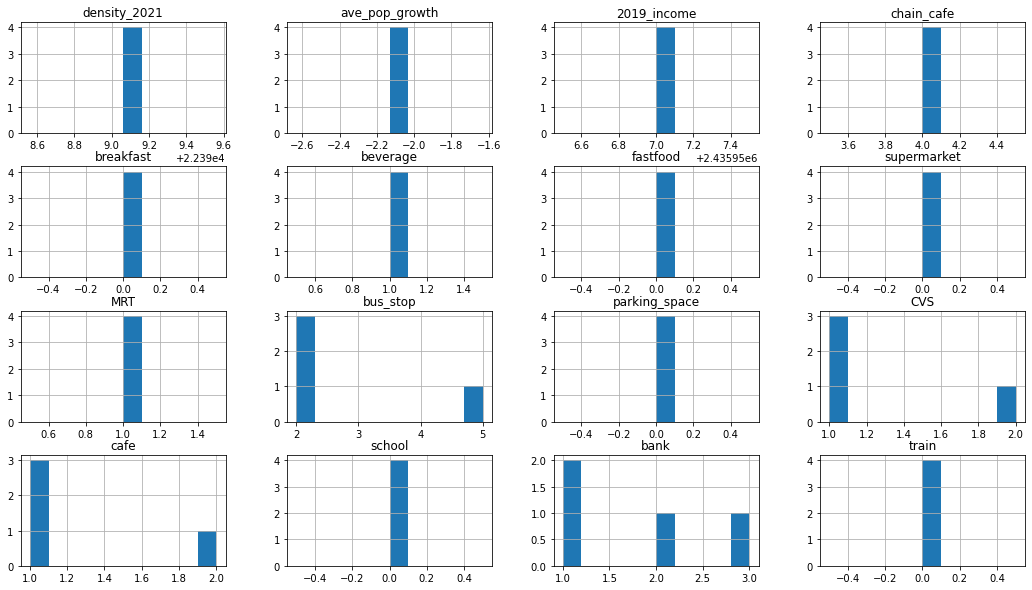

In [38]:
dfz_1.hist(figsize=(18, 10));

# 大部分人口密度(22399.06)
# 人口大多緩步負成長(-2.131716)
# 年收均值(2435957)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(1.5)
# 火車站(0)
# 巴士站至少(2)站

In [39]:
dfz_1.median()

density_2021      2.239906e+04
ave_pop_growth   -2.131716e+00
2019_income       2.435957e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          2.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              1.500000e+00
train             0.000000e+00
dtype: float64

In [40]:
dfz_2=feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']
dfz_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0
mean,8894.226421,-1.548353,1.659264e+06,1.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.333333,0.0
std,12295.891127,0.971423,5.880492e+05,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.577350,0.0
min,1440.067974,-2.364998,9.928780e+05,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
25%,1798.202218,-2.085486,1.436210e+06,1.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,1.5,0.0,0.0,0.000000,0.0
50%,2156.336462,-1.805974,1.879543e+06,1.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.0
75%,12621.305645,-1.140031,1.992456e+06,1.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,2.5,0.0,0.0,0.500000,0.0
max,23086.274827,-0.474087,2.105370e+06,1.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.000000,0.0


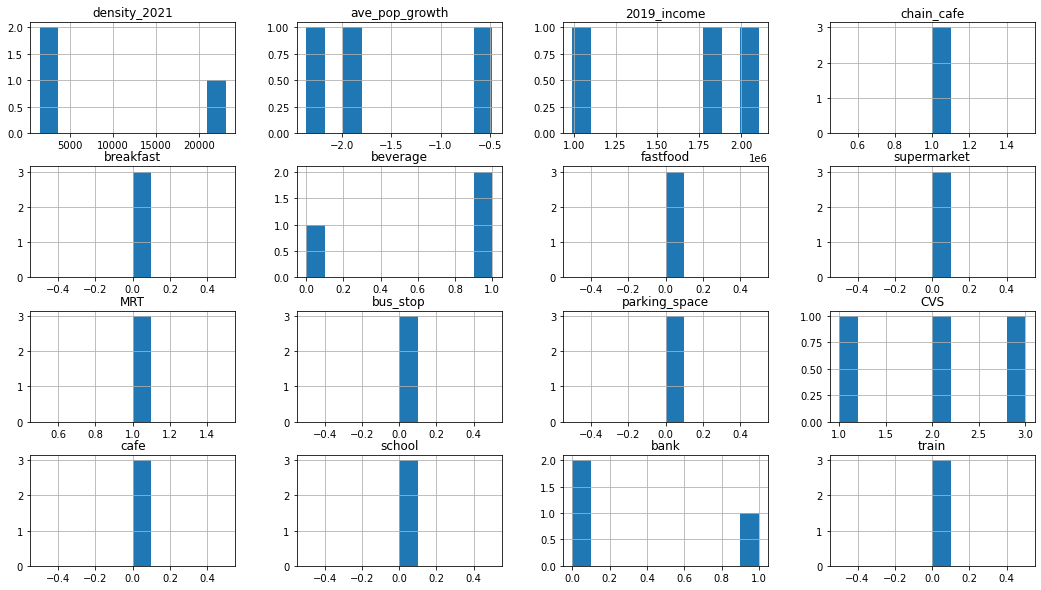

In [41]:
dfz_2.hist(figsize=(18, 10));

# 大部分人口密度(2156.336)
# 人口大多緩步負成長(-1.805974)
# 年收均值(1879543)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(1.5)
# 火車站(0)
# 巴士站至少(2)站

In [42]:
dfz_2.median()

density_2021      2.156336e+03
ave_pop_growth   -1.805974e+00
2019_income       1.879543e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          0.000000e+00
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

In [43]:
dfz_3=feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']
dfz_3.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.0
mean,17648.692697,-2.071866,2.064493e+06,1.0,0.0,2.0,2.0,0.0,0.0,0.333333,0.0,1.666667,0.0,0.0,1.0,0.0
std,7199.092638,0.845193,1.266360e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.577350,0.0,1.154701,0.0,0.0,1.0,0.0
min,9337.143942,-2.661784,1.330649e+06,1.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0
25%,15508.450139,-2.556002,1.333362e+06,1.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.5,0.0
50%,21679.756337,-2.450219,1.336075e+06,1.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0
75%,21804.467075,-1.776907,2.431416e+06,1.0,0.0,2.0,2.0,0.0,0.0,0.500000,0.0,2.000000,0.0,0.0,1.5,0.0
max,21929.177813,-1.103595,3.526756e+06,1.0,0.0,2.0,2.0,0.0,0.0,1.000000,0.0,3.000000,0.0,0.0,2.0,0.0


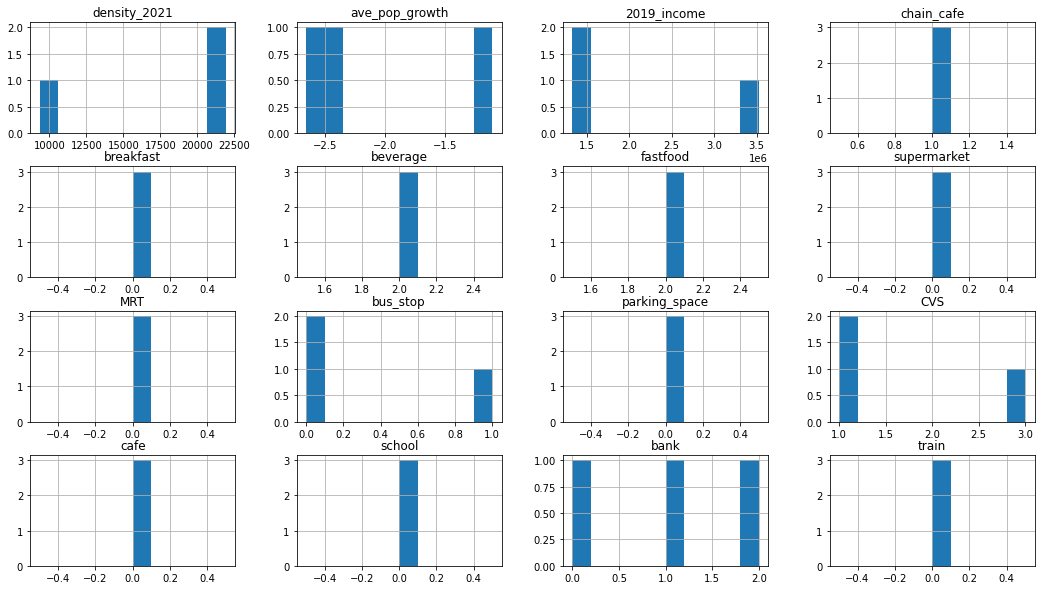

In [44]:
dfz_3.hist(figsize=(18, 10));

# 大部分人口密度(21679.76)
# 人口大多緩步負成長(-2.450219)
# 年收均值(1336075)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(2)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(0)站

In [45]:
dfz_3.median()

density_2021      2.167976e+04
ave_pop_growth   -2.450219e+00
2019_income       1.336075e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          2.000000e+00
fastfood          2.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          0.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

In [46]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
20,cama,台北市信義區松仁路207-1號,25.027041,121.568509,9337.143942,-1.103595,3526756,1,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,台北市信義,3
38,cama,台北市大同區承德路一段30號,25.050647,121.516749,21679.756337,-2.661784,1336075,1,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,台北市大同,3
401,stbks,台北市信義區吳興街220巷1號,25.027667,121.562904,21929.177813,-2.450219,1330649,1,0.0,2.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,台北市信義,3


In [47]:
dfz_4=feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']
dfz_4.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,3.0
mean,37131.214542,-1.493150e+00,3643217.0,3.333333,3.0,0.333333,0.0,0.0,0.0,0.333333,0.0,1.0,0.666667,0.0,2.0,0.0
std,0.000000,2.719480e-16,0.0,0.577350,0.0,0.577350,0.0,0.0,0.0,0.577350,0.0,0.0,0.577350,0.0,0.0,0.0
min,37131.214542,-1.493150e+00,3643217.0,3.000000,3.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,2.0,0.0
25%,37131.214542,-1.493150e+00,3643217.0,3.000000,3.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.500000,0.0,2.0,0.0
50%,37131.214542,-1.493150e+00,3643217.0,3.000000,3.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,1.000000,0.0,2.0,0.0
75%,37131.214542,-1.493150e+00,3643217.0,3.500000,3.0,0.500000,0.0,0.0,0.0,0.500000,0.0,1.0,1.000000,0.0,2.0,0.0
max,37131.214542,-1.493150e+00,3643217.0,4.000000,3.0,1.000000,0.0,0.0,0.0,1.000000,0.0,1.0,1.000000,0.0,2.0,0.0


In [48]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
47,cama,台北市大安區復興南路一段133號,25.042764,121.544088,37131.214542,-1.49315,3643217,3,3.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,台北市大安,4
192,louisa,台北市大安區復興南路一段133-1號,25.042764,121.544214,37131.214542,-1.49315,3643217,3,3.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,台北市大安,4
449,stbks,台北市大安區復興南路一段135巷9號 (SOGO百貨忠孝館後門對面),25.042724,121.544825,37131.214542,-1.49315,3643217,4,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,台北市大安,4


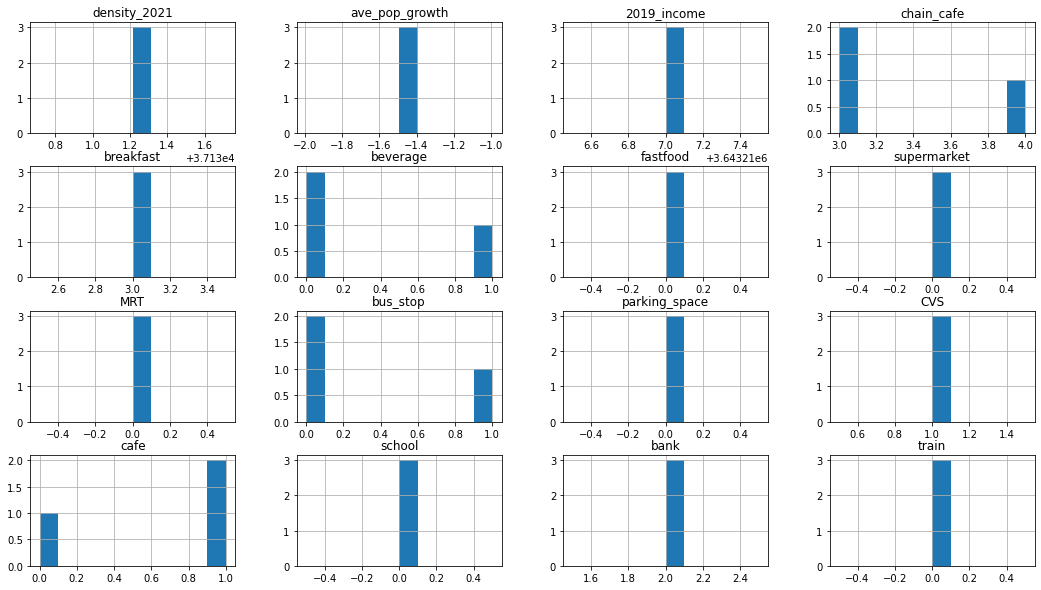

In [49]:
dfz_4.hist(figsize=(18, 10));

# 大部分人口密度(37131.21)
# 人口大多緩步負成長(-1.493150)
# 年收均值(3643217)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(0)站

In [50]:
dfz_4.median()

density_2021      3.713121e+04
ave_pop_growth   -1.493150e+00
2019_income       3.643217e+06
chain_cafe        3.000000e+00
breakfast         3.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          0.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

In [51]:
dfz_5=feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
dfz_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,34528.129688,-0.301371,726279.333333,3.666667,3.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0
std,6133.807741,0.116579,58023.124703,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,30986.774138,-0.368677,659280.000000,3.000000,3.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0
25%,30986.774138,-0.368677,709529.500000,3.500000,3.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0
50%,30986.774138,-0.368677,759779.000000,4.000000,3.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0
75%,36298.807463,-0.267717,759779.000000,4.000000,3.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0
max,41610.840789,-0.166757,759779.000000,4.000000,3.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0


In [52]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
63,cama,新北市板橋區三民路二段67號,25.017021,121.479450,30986.774138,-0.368677,759779,4,3.0,1.0,...,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0,新北市板橋,5
64,cama,新北市板橋區三民路二段67號1樓,25.017021,121.479450,30986.774138,-0.368677,759779,4,3.0,1.0,...,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0,新北市板橋,5
648,85 cafe,新北市板橋區三民路二段66號,25.017337,121.479084,41610.840789,-0.166757,659280,3,3.0,1.0,...,0.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0,新北市板橋,5


In [53]:
dfz_5.median()

density_2021       30986.774138
ave_pop_growth        -0.368677
2019_income       759779.000000
chain_cafe             4.000000
breakfast              3.000000
beverage               1.000000
fastfood               0.000000
supermarket            0.000000
MRT                    0.000000
bus_stop              14.000000
parking_space          0.000000
CVS                    2.000000
cafe                   1.000000
school                 0.000000
bank                   4.000000
train                  0.000000
dtype: float64

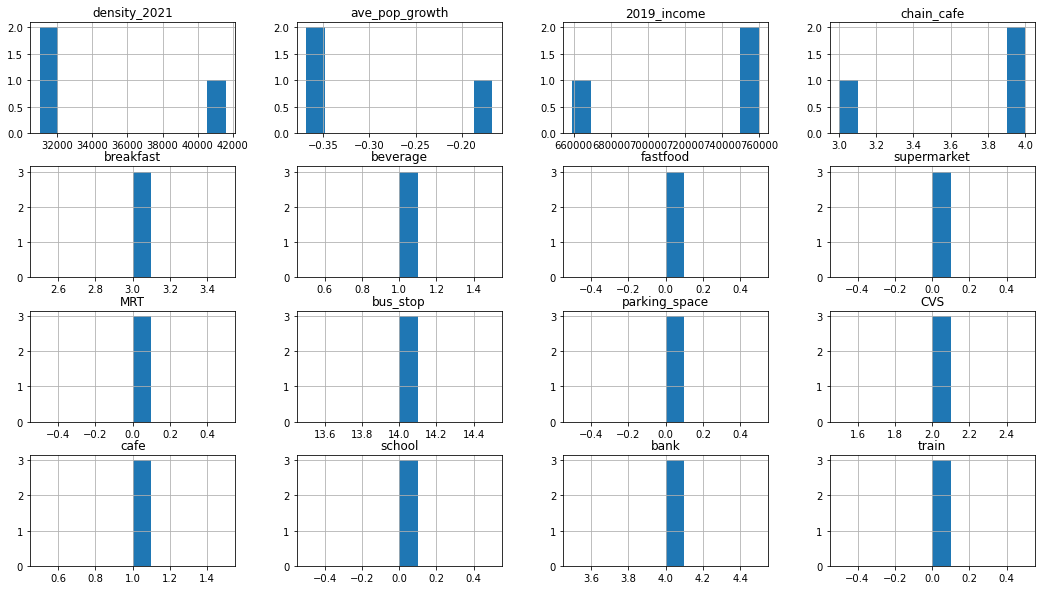

In [54]:
dfz_5.hist(figsize=(18, 10));

# 大部分人口密度(30986.774138)
# 人口大多緩步負成長(-0.368677)
# 年收均值(759779)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(1)
# school(0)
# 銀行(4)
# 火車站(0)
# 巴士站至少(14)站

In [55]:
dfz_6=feature_o[feature_o['labels'] == 6].loc[:,'density_2021':'train']
dfz_6.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000e+00,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,1.564154e+04,1.141744,3539135.0,4.0,0.0,1.0,1.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
std,2.227798e-12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.564154e+04,1.141744,3539135.0,4.0,0.0,1.0,1.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,1.564154e+04,1.141744,3539135.0,4.0,0.0,1.0,1.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,1.564154e+04,1.141744,3539135.0,4.0,0.0,1.0,1.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,1.564154e+04,1.141744,3539135.0,4.0,0.0,1.0,1.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
max,1.564154e+04,1.141744,3539135.0,4.0,0.0,1.0,1.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
feature_o[feature_o['labels'] == 6]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
65,cama,新北市板橋區南雅南路二段21號Ｂ1,24.997312,121.452312,15641.543072,1.141744,3539135,4,0.0,1.0,...,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市板橋,6
525,stbks,新北市板橋區南雅南路二段21號,24.997312,121.452312,15641.543072,1.141744,3539135,4,0.0,1.0,...,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市板橋,6
526,stbks,新北市板橋區南雅南路二段21號(亞東捷運站3號出口亞東醫院旁),24.997312,121.452312,15641.543072,1.141744,3539135,4,0.0,1.0,...,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市板橋,6


In [57]:
dfz_6.median()

density_2021      1.564154e+04
ave_pop_growth    1.141744e+00
2019_income       3.539135e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.800000e+01
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

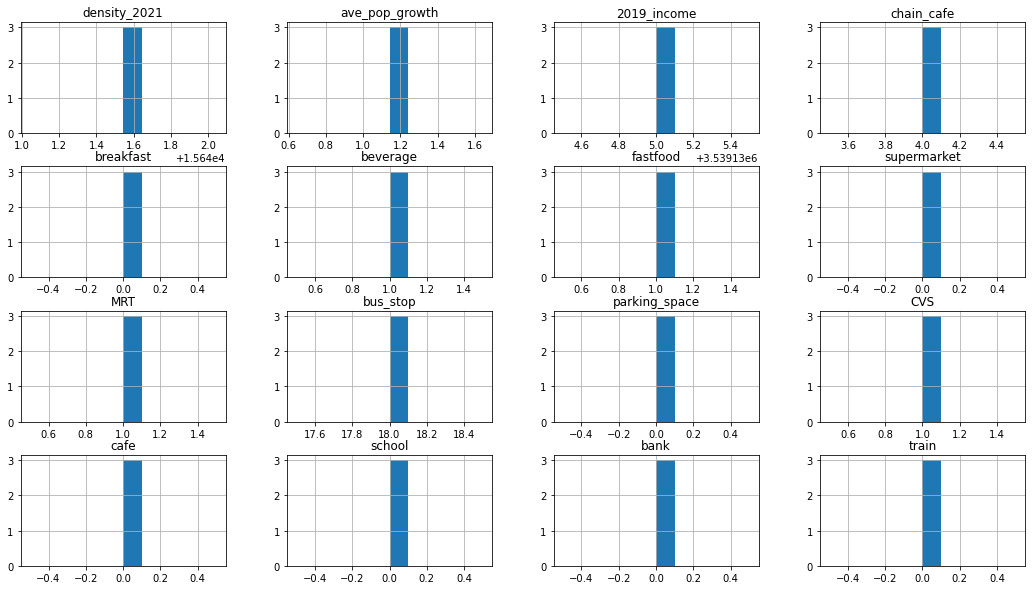

In [58]:
dfz_6.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(18)站

In [59]:
dfz_7=feature_o[feature_o['labels'] == 7].loc[:,'density_2021':'train']
dfz_7.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0
mean,34637.469735,0.163873,2.708968e+06,2.0,0.0,1.0,1.0,0.0,0.0,10.666667,1.0,1.0,0.666667,0.0,0.666667,0.0
std,7678.818489,0.135994,6.911639e+05,0.0,0.0,0.0,0.0,0.0,0.0,4.618802,0.0,0.0,0.577350,0.0,0.577350,0.0
min,25770.733892,0.006841,1.910881e+06,2.0,0.0,1.0,1.0,0.0,0.0,8.000000,1.0,1.0,0.000000,0.0,0.000000,0.0
25%,32420.785775,0.124615,2.509446e+06,2.0,0.0,1.0,1.0,0.0,0.0,8.000000,1.0,1.0,0.500000,0.0,0.500000,0.0
50%,39070.837657,0.242390,3.108012e+06,2.0,0.0,1.0,1.0,0.0,0.0,8.000000,1.0,1.0,1.000000,0.0,1.000000,0.0
75%,39070.837657,0.242390,3.108012e+06,2.0,0.0,1.0,1.0,0.0,0.0,12.000000,1.0,1.0,1.000000,0.0,1.000000,0.0
max,39070.837657,0.242390,3.108012e+06,2.0,0.0,1.0,1.0,0.0,0.0,16.000000,1.0,1.0,1.000000,0.0,1.000000,0.0


In [60]:
feature_o[feature_o['labels'] == 7]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
72,cama,新北市汐止區新台五路一段99號B1,25.061620,121.648248,39070.837657,0.242390,3108012,2,0.0,1.0,...,0.0,8.0,1.0,1.0,1.0,0.0,1.0,0.0,新北市汐止,7
496,stbks,新北市中和區中山路三段122號,25.006077,121.475689,25770.733892,0.006841,1910881,2,0.0,1.0,...,0.0,16.0,1.0,1.0,0.0,0.0,0.0,0.0,新北市中和,7
559,stbks,新北市汐止區新台五路一段99號,25.061620,121.648248,39070.837657,0.242390,3108012,2,0.0,1.0,...,0.0,8.0,1.0,1.0,1.0,0.0,1.0,0.0,新北市汐止,7


In [61]:
dfz_7.median()

density_2021      3.907084e+04
ave_pop_growth    2.423895e-01
2019_income       3.108012e+06
chain_cafe        2.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          8.000000e+00
parking_space     1.000000e+00
CVS               1.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

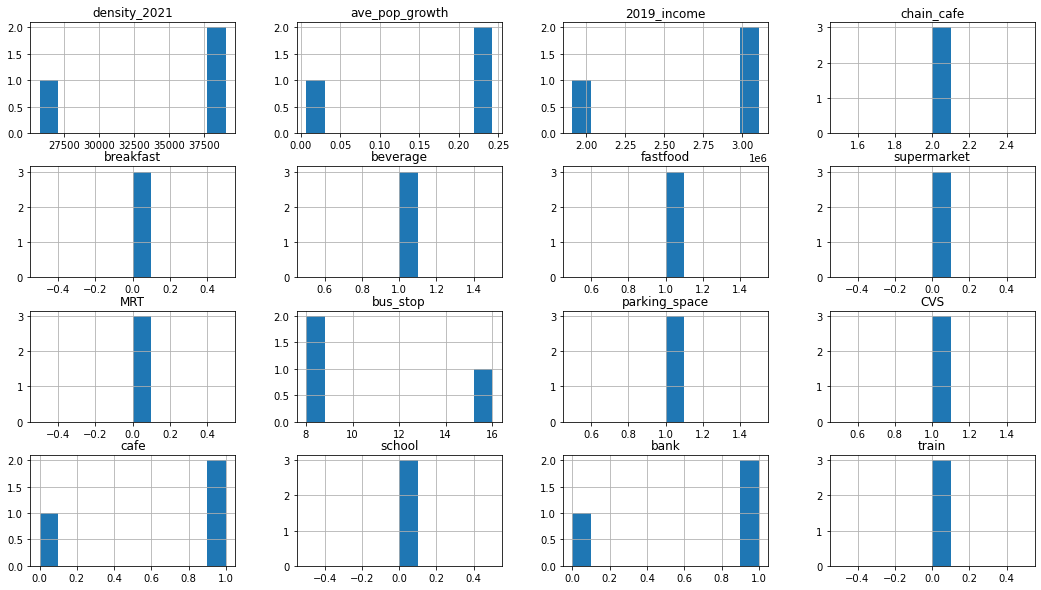

In [62]:
dfz_7.hist(figsize=(18, 10));

# 大部分人口密度(39070.84)
# 人口大多緩步負成長(0.2423895)
# 年收均值(3108012)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(8)站

In [63]:
dfz_8=feature_o[feature_o['labels'] == 8].loc[:,'density_2021':'train']
dfz_8.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.000000e+00,4.0,4.0,4.00,4.00000,4.0,4.0,4.000000,4.0,4.0,4.0,4.0,4.00000,4.0
mean,53033.760729,0.724073,1.161912e+06,1.0,0.0,0.25,0.50000,0.0,1.0,43.000000,0.0,1.0,0.0,0.0,1.50000,0.0
std,9328.256370,1.379740,1.244458e+06,0.0,0.0,0.50,0.57735,0.0,0.0,6.733003,0.0,0.0,0.0,0.0,0.57735,0.0
min,45700.290734,-0.390402,3.551910e+05,1.0,0.0,0.00,0.00000,0.0,1.0,39.000000,0.0,1.0,0.0,0.0,1.00000,0.0
25%,46179.646064,-0.063902,5.085405e+05,1.0,0.0,0.00,0.00000,0.0,1.0,39.000000,0.0,1.0,0.0,0.0,1.00000,0.0
50%,50363.667523,0.285271,6.385825e+05,1.0,0.0,0.00,0.50000,0.0,1.0,40.000000,0.0,1.0,0.0,0.0,1.50000,0.0
75%,57217.782188,1.073246,1.291954e+06,1.0,0.0,0.25,1.00000,0.0,1.0,44.000000,0.0,1.0,0.0,0.0,2.00000,0.0
max,65707.417134,2.716150,3.015293e+06,1.0,0.0,1.00,1.00000,0.0,1.0,53.000000,0.0,1.0,0.0,0.0,2.00000,0.0


In [64]:
feature_o[feature_o['labels'] == 8]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
227,louisa,新北市三重區重新路三段94號,25.060594,121.492863,54387.903872,-0.390402,559657,1,0.0,0.0,...,1.0,39.0,0.0,1.0,0.0,0.0,1.0,0.0,新北市三重,8
530,stbks,新北市板橋區文化路1段360號,25.023422,121.468655,65707.417134,0.044931,3015293,1,0.0,0.0,...,1.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,新北市板橋,8
555,stbks,新北市永和區永和路二段181號,25.013342,121.515258,46339.431174,0.525612,717508,1,0.0,0.0,...,1.0,39.0,0.0,1.0,0.0,0.0,2.0,0.0,新北市永和,8
608,85 cafe,新北市三重區重新路一段100號,25.063329,121.501296,45700.290734,2.716150,355191,1,0.0,1.0,...,1.0,53.0,0.0,1.0,0.0,0.0,2.0,0.0,新北市三重,8


In [65]:
dfz_8.median()

density_2021       50363.667523
ave_pop_growth         0.285271
2019_income       638582.500000
chain_cafe             1.000000
breakfast              0.000000
beverage               0.000000
fastfood               0.500000
supermarket            0.000000
MRT                    1.000000
bus_stop              40.000000
parking_space          0.000000
CVS                    1.000000
cafe                   0.000000
school                 0.000000
bank                   1.500000
train                  0.000000
dtype: float64

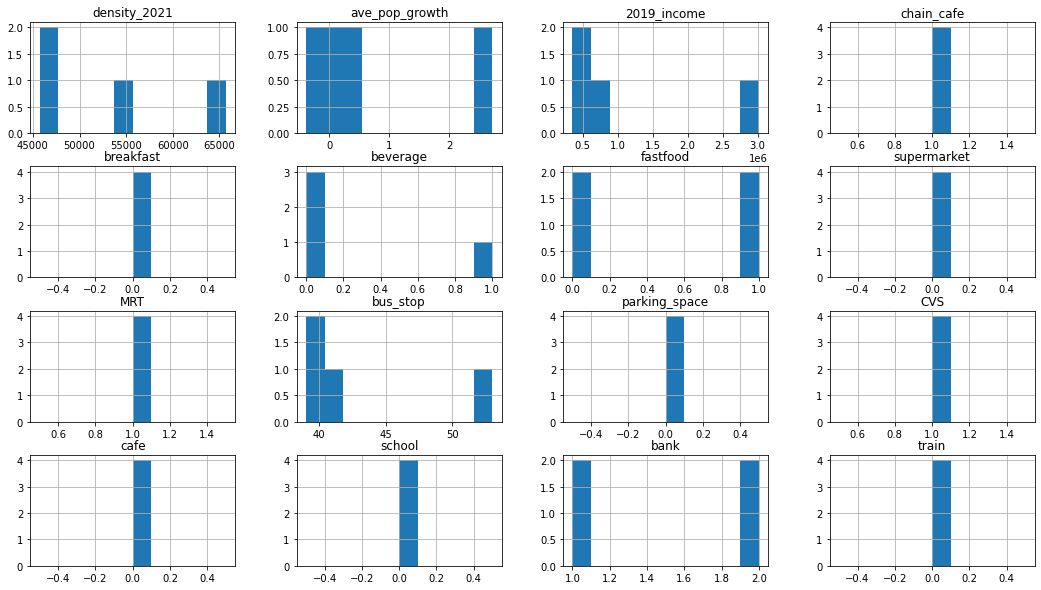

In [66]:
dfz_8.hist(figsize=(18, 10));

# 大部分人口密度(50363.667523)
# 人口大多緩步負成長(0.285271)
# 年收均值(638582.5)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0.5)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(0)
# 銀行(1.5)
# 火車站(0)
# 巴士站至少(40)站

In [67]:
dfz_9=feature_o[feature_o['labels'] == 9].loc[:,'density_2021':'train']
dfz_9.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.0
mean,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.333333,0.0,0.0,1.0,38.333333,1.0,2.666667,0.0,0.0,0.0,0.0
std,0.000000,5.438960e-16,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,8.082904,0.0,1.154701,0.0,0.0,0.0,0.0
min,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.000000,0.0,0.0,1.0,29.000000,1.0,2.000000,0.0,0.0,0.0,0.0
25%,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.000000,0.0,0.0,1.0,36.000000,1.0,2.000000,0.0,0.0,0.0,0.0
50%,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.000000,0.0,0.0,1.0,43.000000,1.0,2.000000,0.0,0.0,0.0,0.0
75%,18733.977285,2.921902e+00,803548.0,3.0,0.0,0.500000,0.0,0.0,1.0,43.000000,1.0,3.000000,0.0,0.0,0.0,0.0
max,18733.977285,2.921902e+00,803548.0,3.0,0.0,1.000000,0.0,0.0,1.0,43.000000,1.0,4.000000,0.0,0.0,0.0,0.0


In [68]:
feature_o[feature_o['labels'] == 9]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
269,louisa,新北市新店區北宜路一段26號,24.957101,121.537961,18733.977285,2.921902,803548,3,0.0,1.0,...,1.0,29.0,1.0,4.0,0.0,0.0,0.0,0.0,新北市新店,9
509,stbks,新北市新店區北宜路一段2號,24.957871,121.537784,18733.977285,2.921902,803548,3,0.0,0.0,...,1.0,43.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市新店,9
510,stbks,新北市新店區北宜路一段2號2F,24.957871,121.537784,18733.977285,2.921902,803548,3,0.0,0.0,...,1.0,43.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市新店,9


In [69]:
dfz_9.median()

density_2021       18733.977285
ave_pop_growth         2.921902
2019_income       803548.000000
chain_cafe             3.000000
breakfast              0.000000
beverage               0.000000
fastfood               0.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              43.000000
parking_space          1.000000
CVS                    2.000000
cafe                   0.000000
school                 0.000000
bank                   0.000000
train                  0.000000
dtype: float64

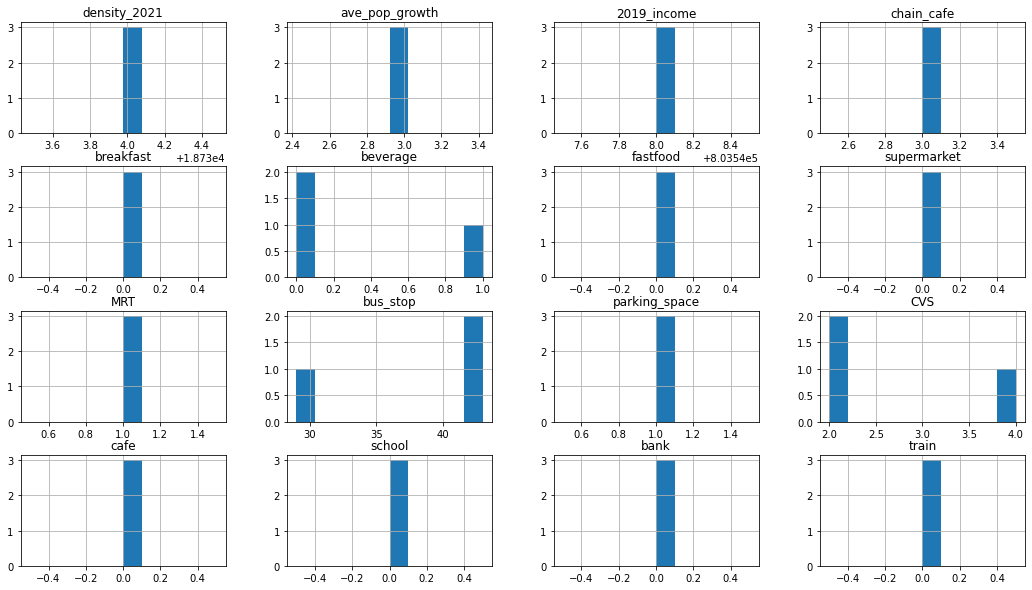

In [70]:
dfz_9.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口大多緩步負成長(2.921902)
# 年收均值(803548)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(1)
# CVS(2)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(43)站

In [71]:
dfz_10=feature_o[feature_o['labels'] == 10].loc[:,'density_2021':'train']
dfz_10.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.000000,3.0
mean,74890.335897,-0.181214,2.106692e+06,3.0,0.0,1.0,1.0,0.0,0.0,7.666667,0.0,1.0,0.0,0.0,0.666667,0.0
std,1686.311431,1.526189,6.505854e+05,0.0,0.0,0.0,0.0,0.0,0.0,2.309401,0.0,0.0,0.0,0.0,1.154701,0.0
min,73916.743538,-1.062359,1.731076e+06,3.0,0.0,1.0,1.0,0.0,0.0,5.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,73916.743538,-1.062359,1.731076e+06,3.0,0.0,1.0,1.0,0.0,0.0,7.000000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,73916.743538,-1.062359,1.731076e+06,3.0,0.0,1.0,1.0,0.0,0.0,9.000000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,75377.132076,0.259359,2.294500e+06,3.0,0.0,1.0,1.0,0.0,0.0,9.000000,0.0,1.0,0.0,0.0,1.000000,0.0
max,76837.520614,1.581078,2.857923e+06,3.0,0.0,1.0,1.0,0.0,0.0,9.000000,0.0,1.0,0.0,0.0,2.000000,0.0


In [72]:
feature_o[feature_o['labels'] == 10]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
283,louisa,新北市新莊區幸福路773號,25.049022,121.446915,76837.520614,1.581078,2857923,3,0.0,1.0,...,0.0,5.0,0.0,1.0,0.0,0.0,2.0,0.0,新北市新莊,10
518,stbks,新北市新莊區幸福路763-3號1F之1,25.049057,121.447615,73916.743538,-1.062359,1731076,3,0.0,1.0,...,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市新莊,10
519,stbks,新北市新莊區幸福路763-3號1F之1(新莊中和街與幸福路交叉口佳瑪賣場),25.049057,121.447615,73916.743538,-1.062359,1731076,3,0.0,1.0,...,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市新莊,10


In [73]:
dfz_10.median()

density_2021      7.391674e+04
ave_pop_growth   -1.062359e+00
2019_income       1.731076e+06
chain_cafe        3.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          9.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

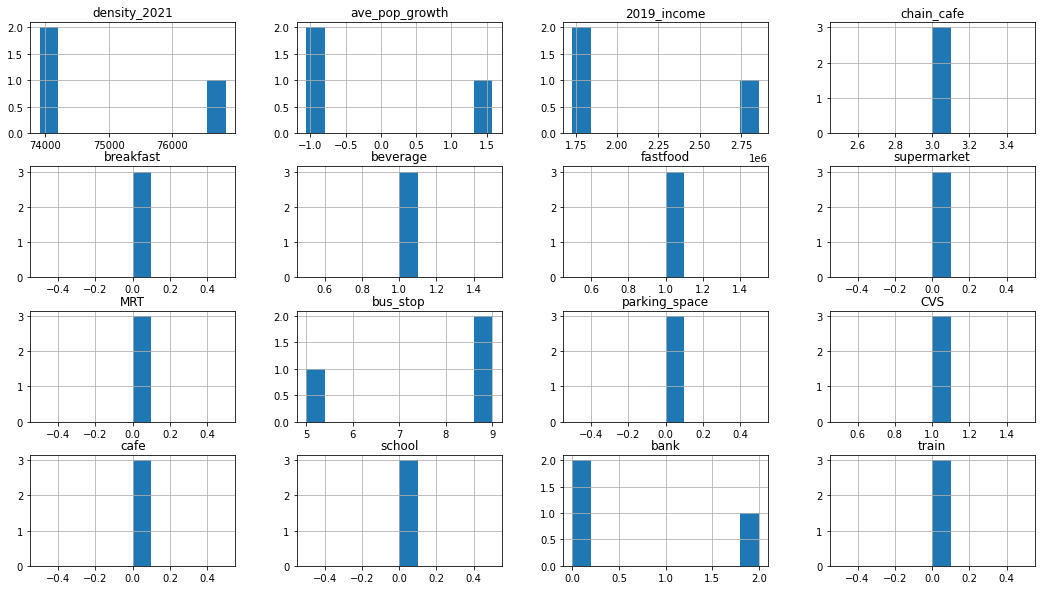

In [74]:
dfz_10.hist(figsize=(18, 10));

# 大部分人口密度(73916.74)
# 人口大多緩步負成長(-1.062359)
# 年收均值(1731076)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(9)站

In [75]:
dfz_11=feature_o[feature_o['labels'] == 11].loc[:,'density_2021':'train']
dfz_11.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
25%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
50%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
75%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0
max,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0


In [76]:
feature_o[feature_o['labels'] == 11]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,11
533,stbks,新北市板橋區縣民大道二段7號1F,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,11
534,stbks,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,11
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,11
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,0.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,新北市板橋,11


In [77]:
dfz_11.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.000000e+00
parking_space     3.000000e+00
CVS               4.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             1.000000e+00
dtype: float64

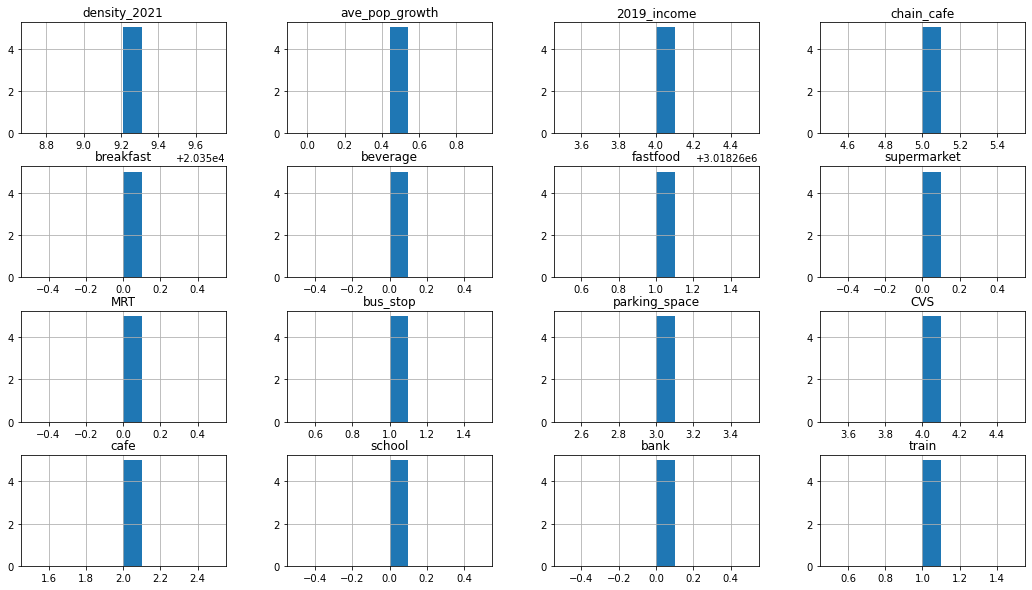

In [78]:
dfz_11.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口成長(0.4416789)
# 年收均值(3018264)
# 平均有(5)間小型咖啡廳
# 早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(3)
# CVS(4)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(1)
# 巴士站至少(1)站

In [83]:
dfz_12=feature_o[feature_o['labels'] == 12].loc[:,'density_2021':'train']
dfz_12.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0
mean,8750.887689,7.496946,9.995468e+06,3.0,1.0,0.0,1.0,0.0,0.0,20.0,0.0,1.333333,2.0,0.0,0.0,0.0
std,1557.798848,2.479376,5.051953e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,0.0
min,6952.096520,6.065478,9.703793e+06,3.0,1.0,0.0,1.0,0.0,0.0,20.0,0.0,1.000000,2.0,0.0,0.0,0.0
25%,8301.189897,6.065478,9.703793e+06,3.0,1.0,0.0,1.0,0.0,0.0,20.0,0.0,1.000000,2.0,0.0,0.0,0.0
50%,9650.283273,6.065478,9.703793e+06,3.0,1.0,0.0,1.0,0.0,0.0,20.0,0.0,1.000000,2.0,0.0,0.0,0.0
75%,9650.283273,8.212680,1.014130e+07,3.0,1.0,0.0,1.0,0.0,0.0,20.0,0.0,1.500000,2.0,0.0,0.0,0.0
max,9650.283273,10.359882,1.057882e+07,3.0,1.0,0.0,1.0,0.0,0.0,20.0,0.0,2.000000,2.0,0.0,0.0,0.0


In [80]:
feature_o[feature_o['labels'] == 12]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
308,louisa,新北市林口區仁愛路二段249號,25.076851,121.374191,6952.096520,10.359882,10578817,3,1.0,0.0,...,0.0,20.0,0.0,2.0,2.0,0.0,0.0,0.0,新北市林口,12
544,stbks,新北市林口區文化二路一段551號,25.077230,121.374582,9650.283273,6.065478,9703793,3,1.0,0.0,...,0.0,20.0,0.0,1.0,2.0,0.0,0.0,0.0,新北市林口,12
545,stbks,新北市林口區文化二路一段551號(家樂福隔壁),25.077230,121.374582,9650.283273,6.065478,9703793,3,1.0,0.0,...,0.0,20.0,0.0,1.0,2.0,0.0,0.0,0.0,新北市林口,12


In [81]:
dfz_12.median()

density_2021      9.650283e+03
ave_pop_growth    6.065478e+00
2019_income       9.703793e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          2.000000e+01
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

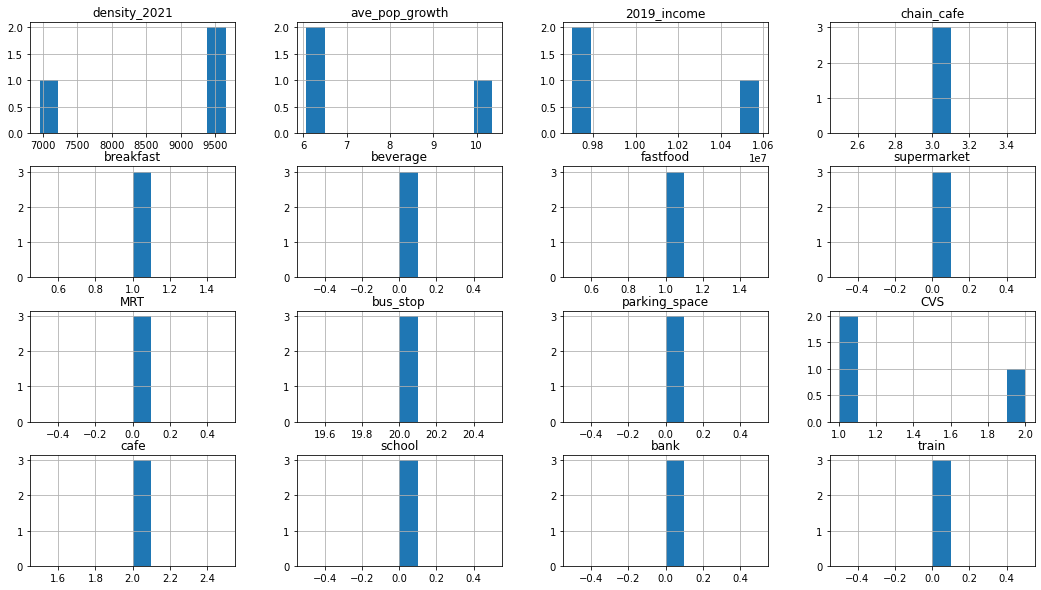

In [82]:
dfz_12.hist(figsize=(18, 10));

# 大部分人口密度(9650.283)
# 人口大多緩步負成長(6.065478)
# 年收均值(9703793)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(1)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(20)站

In [86]:
dfz_13=feature_o[feature_o['labels'] == 13].loc[:,'density_2021':'train']
dfz_13.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.0,4.00000,4.0,4.0,4.0,4.0
mean,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,28.500000,1.0,1.50000,0.0,0.0,0.0,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.785939,0.0,0.57735,0.0,0.0,0.0,0.0
min,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,23.000000,1.0,1.00000,0.0,0.0,0.0,0.0
25%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,27.500000,1.0,1.00000,0.0,0.0,0.0,0.0
50%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,30.000000,1.0,1.50000,0.0,0.0,0.0,0.0
75%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,31.000000,1.0,2.00000,0.0,0.0,0.0,0.0
max,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,31.000000,1.0,2.00000,0.0,0.0,0.0,0.0


In [87]:
feature_o[feature_o['labels'] == 13]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
317,louisa,新北市樹林區大雅路282號,24.947306,121.379956,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,23.0,1.0,1.0,0.0,0.0,0.0,0.0,新北市樹林,13
429,stbks,台北市士林區振興街37號,24.947638,121.379931,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,31.0,1.0,1.0,0.0,0.0,0.0,0.0,台北市士林,13
548,stbks,新北市樹林區大雅路288號,24.947600,121.379874,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市樹林,13
549,stbks,新北市樹林區家樂福北大店大雅路288號,24.947667,121.379910,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,31.0,1.0,2.0,0.0,0.0,0.0,0.0,新北市樹林,13


In [88]:
dfz_13.median()

density_2021      1.195340e+04
ave_pop_growth    8.386823e-01
2019_income       5.934044e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          3.000000e+01
parking_space     1.000000e+00
CVS               1.500000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

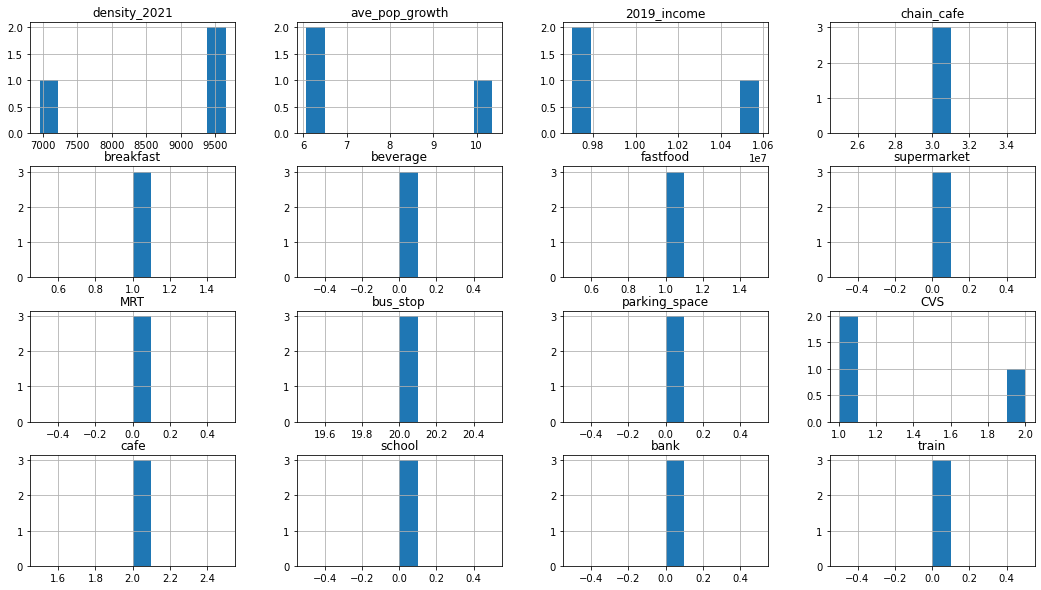

In [89]:
dfz_12.hist(figsize=(18, 10));

# 大部分人口密度(11953.40)
# 人口大多緩步負成長(0.8386823)
# 年收均值(5934044)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(1.5)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(30)站